In [1]:
import matplotlib.pyplot as plt
import torch

In [2]:
from torch.utils.data import DataLoader
from torch.utils.data.sampler import RandomSampler
from torchvision.datasets import CIFAR10

# Flatten the images into a vector
# flatten = lambda x: ToTensor()(x).view(28**2)

import ddpm


ddpm.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the train and test sets
dset_train = CIFAR10("./CIFAR10", train=True,  transform=ddpm.preprocess, download=True)
dset_test  = CIFAR10("./CIFAR10", train=False, transform=ddpm.preprocess)

batch_size = 128
eval_batch_size = 200
# The loaders perform the actual work
train_loader = DataLoader(dset_train, batch_size=batch_size,
                          sampler=RandomSampler(dset_train))
test_loader  = DataLoader(dset_test, batch_size=eval_batch_size,
                          sampler=RandomSampler(dset_test))

Files already downloaded and verified


In [6]:
from unet import UNet

In [3]:
next(iter(train_loader))[0][0].shape

torch.Size([3, 32, 32])

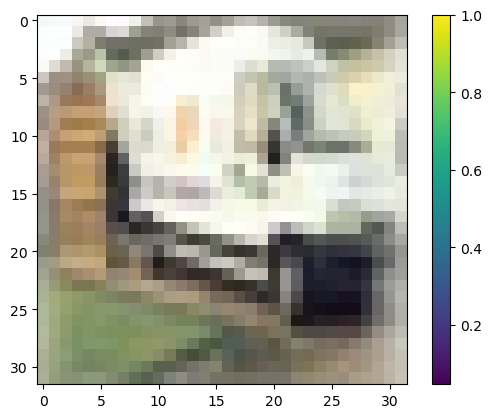

In [4]:
im = torch.swapaxes(next(iter(train_loader))[0][0], 0, 2)
im = torch.swapaxes(im, 0, 1).numpy().squeeze()
plt.imshow((im+1)/2)
plt.colorbar()

In [5]:
model = ddpm.train_ddpm("CIFAR10", train_loader, test_loader, epochs=100, lr=2e-4)

device:  cpu
Epoch 1
-------------------------------
loss: 1.171238  [  128/50000]


KeyboardInterrupt: 

In [ ]:
model = UNet(in_channels=3)
model.load_state_dict(torch.load("cifar10_linear.pt", weights_only=True)map_location=torch.device('cpu'))
model.eval()

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.